***
### IT575 Computational Shape Modeling (3-0-0-3)
### Autumn 2024-25
***
##### Assignment 1: Fourier Descriptors for 2D shapes

***

***
Group no. $\underline{\hspace{0.5in}}$

Student 1 ID: $202103017$ Student 1 Name: Dhruv Shah

Student 2 ID: $202103052$ Student 2 Name: Vraj Thakkar
***


In [51]:
# Do not include any other libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas

#### Consider the outline of the 2D objects given in the .csv files: ```bird1.csv``` and ```bird2.csv```. You can read the boundary points from the csv files to a numpy array and plot it in a figure, as shown below. The code below should run given that the .csv files are in the same folder as this notebook.

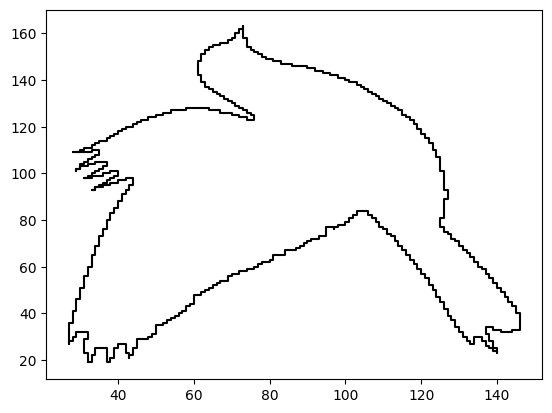

In [52]:
csv = pandas.read_csv('bird1.csv') # Also try with bird2.csv
b = csv.values
plt.plot(b[:,0],b[:,1],'k') # Plots Boundary of a 2D object, Col. 1 of b is x coord, Col. 2 is y coord.

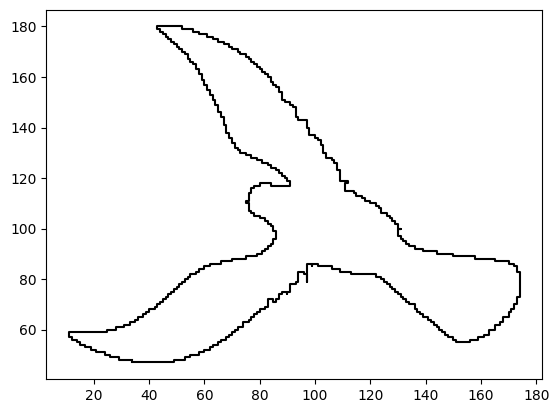

In [53]:
# This will plot bird2.csv

csv2 = pandas.read_csv('bird2.csv')
b2 = csv2.values
plt.plot(b2[:,0],b2[:,1],'k') # Plots Boundary of a 2D object, Col. 1 of b is x coord, Col. 2 is y coord.

#### Given a periodic parametric curve $c(t) = x(t) + i y(t), t \in \mathbb{R}$, with period $[0,T]$, it can be represented by coefficients in the Exponential Fourier series: $c(t) = \sum_{k\in \mathbb{Z}} p_k \exp\left(i \frac{2\pi}{T} kt\right), t \in \mathbb{R}$.

#### We are given a set of samples of $c(t)$, denoted by $c[n] = x[n]+iy[n],n=0,\ldots,N-1$. This is a discrete complex valued periodic sequence with period $N$, and it can be represented by the coefficients of the Discrete Fourier Transform(DFT): $c[n] = \frac{1}{N}\sum_{k=0}^{N-1} p[k]\exp\left(i\frac{2\pi}{N}nk\right), n=0,\ldots,N-1$. This equation is called the Inverse Discrete Fourier Transform (IDFT). The coefficients $p[k]$ are calculated via the DFT: $p[k] = \sum_{n=0}^{N-1} c[n]\exp\left(-i\frac{2\pi}{N}nk\right), k=0,\ldots,N-1$. The DFT and IDFT pairs are implemented in Numpy as ```numpy.fft.fft``` and ```numpy.fft.ifft```.

#### Your assignment is to see the effect of using only a few DFT coefficients in order to reconstruct the boundary of the object. Do keep in mind the frequency interpretation of the order of DFT coefficients: $k=0$ corresponds to the DC or average component, frequence increases as $k$ increases from $1$ to $\frac{N}{2}$ and again starts decreasing to $k=N$. If you decide to preserve only 11 components, these should correspond to $k=0,1,2,3,4,5, N-5,N-4,N-3,N-2,N-1$ (the remaining should be set to zero).


#### Write a Python function ```myFD``` that takes an $N \times 2$ matrix, say $b$ containing boundary coordinates, and a number $p\in [0,100]$ the percentage of Fourier coefficients to preserve, and returns the Fourier Descriptors with $100-p$ appropriate coefficients set to $0$, and the reconstruction error. If $b$ denotes the original boundary, and $br$ denotes the reconstructed boundary using only the preserved DFT coefficients, both matrices of size $N \times 2$, the reconstruction error is $||b-br||_{F}$, where $||\cdot||_{F}$ denotes the Frobenius norm. The function should also plot the reconstructed boundary.

In [54]:
# Write your Python function in this cell. Do not run it on examples in this cell.
# Do not change the function definition. br is reconstructed boundary, r_err is recon. err.
def myFD(b,p):

    real = b[:,0]
    imag = b[:,1]
    c = real + 1j*imag

    p_k = np.fft.fft(c)
    N = len(c)

    pt = N * p/100
    pt = int(pt)

    p_k[int(pt/2): N-int(pt/2)] = 0

    ift = np.fft.ifft(p_k)

    real_part = np.real(ift)
    imag_part = np.imag(ift)

    br = np.column_stack((real_part,imag_part))

    r_err = np.linalg.norm(b-br,'fro')

    return br,r_err

We first implement our myFD function for Bird1, for different values of p

9.427081828940537


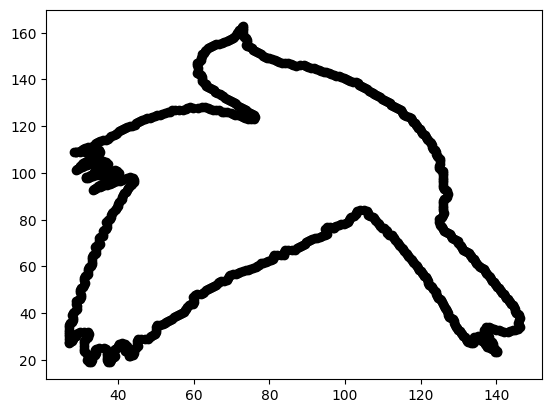

In [55]:
# Run your function myFD for the two given csv files in this cell for different inputs p
br, r_err = myFD(b,50) # p = 50
plt.scatter(br[:,0],br[:,1], color='k')
print(r_err)

4.339551386362805


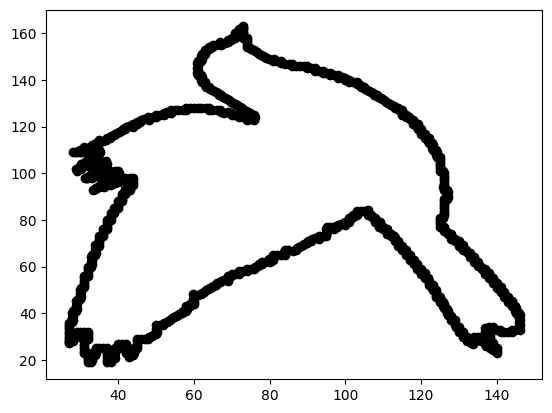

In [56]:
br, r_err = myFD(b,90) # p = 90
plt.scatter(br[:,0],br[:,1], color='k')
print(r_err)

199.41350870906086


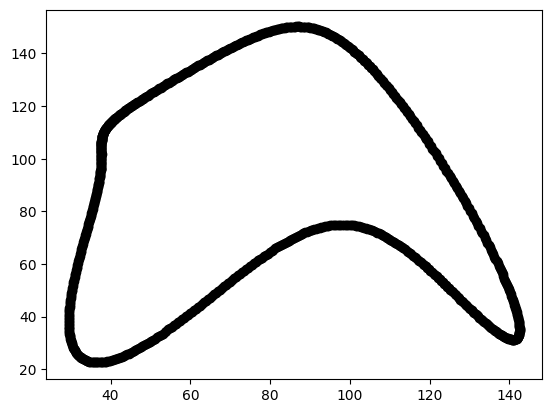

In [57]:
br, r_err = myFD(b,1) # p = 10
plt.scatter(br[:,0],br[:,1], color='k')
print(r_err)

We now implement the same function myFD for bird2.csv, again simulating for different values of p.

9.07869341020256


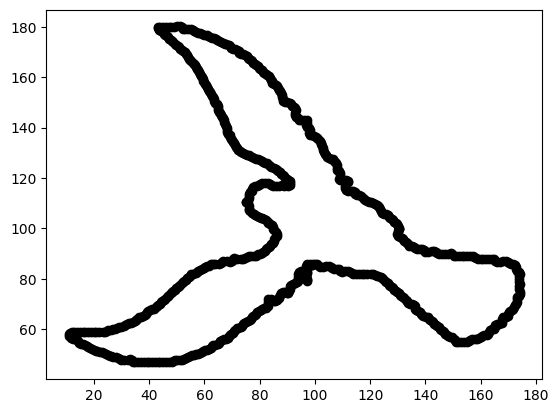

In [58]:
br2, r_err2 = myFD(b2,50) # p = 50
plt.scatter(br2[:,0],br2[:,1], color='k')
print(r_err2)

4.648015412232963


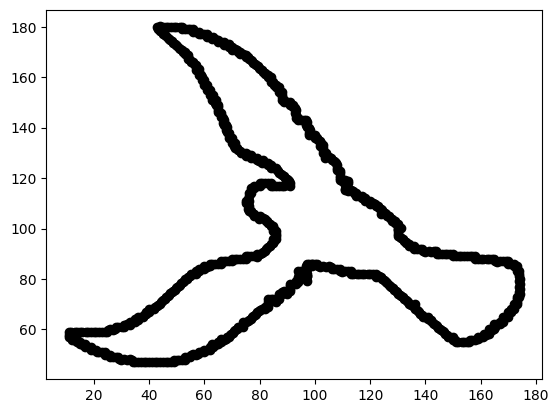

In [59]:
br2, r_err2 = myFD(b2,90) # p = 90
plt.scatter(br2[:,0],br2[:,1], color='k')
print(r_err2)

290.20429324678474


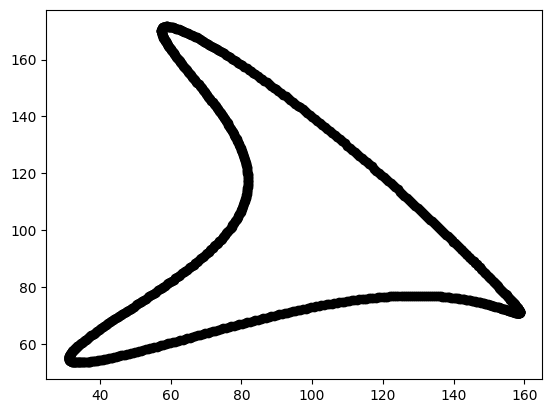

In [60]:
br2, r_err2 = myFD(b2,1) # p = 1
plt.scatter(br2[:,0],br2[:,1], color='k')
print(r_err2)

From our above simulations we observe that as the value of p becomes less, the reconstruction error increases. Therefore, clearly we can see that the boundary reconstruction is less accurate at lower values of p.

This is clearly seen by visually comparing the original plot of the .csv files and their corresponding reconstructed boundary using the myFD function.

#### Plot reconstruction error against $p$ for both the examples given. Suggested values of $p$ are $[1,10,20,30,\ldots,100]$. What percentage of DFT coefficients are required to achieve a reconstruction error equal to or less than $0.1||b||_{F}$ for both examples (separately), where $b$ denotes the original boundary coordinate matrix.

Text(0.5, 1.0, 'Reconstruction Error vs p')

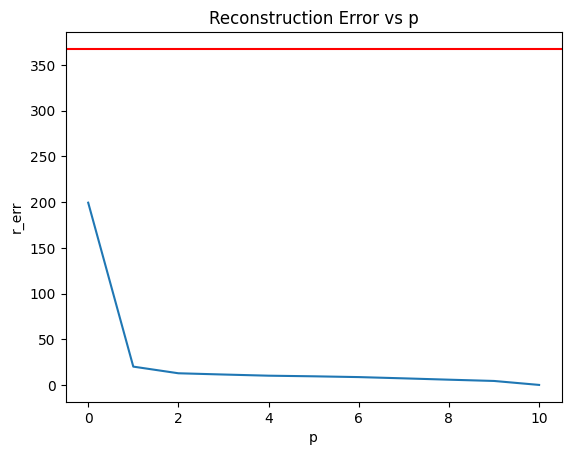

In [61]:
# For bird1.csv
err=[]
p=[1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

b_f = np.linalg.norm(b)
b_f = 0.1*b_f
plt.axhline(y=b_f, color='r', linestyle='-', label='$0.1||b||_{F}$')

for i in range(len(p)):
    br, r_err = myFD(b,p[i])
    err.append(r_err)
plt.plot(range(len(p)),err)
plt.xlabel("p")
plt.ylabel("r_err")
plt.title("Reconstruction Error vs p")

Text(0.5, 1.0, 'Reconstruction Error vs p')

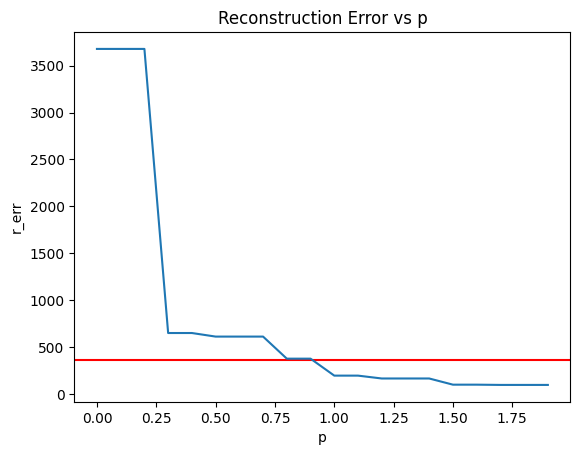

In [62]:
b_f = np.linalg.norm(b)
b_f = 0.1*b_f
plt.axhline(y=b_f, color='r', linestyle='-', label='$0.1||b||_{F}$')

err_new = []
for i in np.arange(0,2,0.1):
    br, r_err = myFD(b,i)
    err_new.append(r_err)
plt.plot(np.arange(0,2,0.1),err_new)
plt.xlabel("p")
plt.ylabel("r_err")
plt.title("Reconstruction Error vs p")

Text(0.5, 1.0, 'Reconstruction Error vs p')

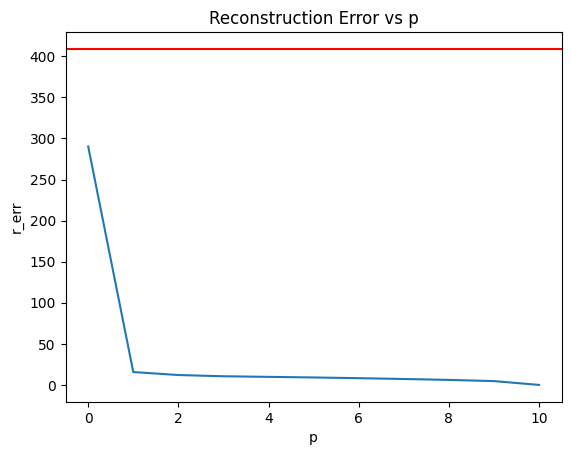

In [63]:
#For bird2.csv

err2 = []
b_f2 = np.linalg.norm(b2)
b_f2 = 0.1*b_f2
plt.axhline(y=b_f2, color='r', linestyle='-', label='$0.1||b||_{F}$')

for i in range(len(p)):
    br2, r_err2 = myFD(b2,p[i])
    err2.append(r_err2)
plt.plot(range(len(p)),err2)
plt.xlabel("p")
plt.ylabel("r_err")
plt.title("Reconstruction Error vs p")

#### Write your answers/additional comments in the cell below



Here we observe that for the suggested values of p, the reconstruction error is always observed less than $0.1||b||_{F}$.  

But when we take values of $p$ less than 1. We observe that reconstruction error is greater than $0.1||b||_{F}$ till around $p=0.875$.

#### What will you get if you use only the first (DC) Fourier coefficent (rest all set to 0) to reconstruct the boundary? What will you get if you use only the coefficients for $k=0,1,N-1$ to reconstruct the boundary? Try answering this question without simulating/experimenting.



The coefficients of the DFT are all zero except the first one which means we have only P[K] with K = 0 as non zero. With this we can see the value of C(t) = P[0] for all t which will just be a point on the plane which is the average of all the points on the plane. Then for the next case we will have C(t) = P[0] + P[1]$e^{i2\pi t/842}$ + P[841]$e^{i2\pi 841t/842}$. For all t we will see that we get a circle sort of a figure because P[1] is rotated with different values of t as if on a circle and P[841] is also similarly. P[1] and P[841] which are the complex conjugates of each other are put in the equation to find C(t) will give circle. P[1]$e^{i2\pi t/842}$ is the complex conjugate of P[841]$e^{i2\pi 841t/842}$ for all t if we expand the equation it turns out to be of the form of the circle.  